In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, pickle, glob
import shutil

plt.style.use('ggplot')
sns.set_theme()
plt.rcParams["figure.figsize"] = (12, 4)

In [26]:
curr_dir = os.getcwd()
experiments = sorted(glob.glob('../experiments/case_4/*.pkl'),  key=os.path.getmtime)
experiments

['../experiments/case_4/run_05-05-2023_00:22:39.pkl',
 '../experiments/case_4/run_05-05-2023_00:35:14.pkl',
 '../experiments/case_4/run_05-05-2023_20:01:17.pkl',
 '../experiments/case_4/run_05-05-2023_20:56:25.pkl',
 '../experiments/case_4/run_05-05-2023_21:27:11.pkl',
 '../experiments/case_4/run_05-05-2023_22:46:34.pkl',
 '../experiments/case_4/run_05-05-2023_23:39:53.pkl',
 '../experiments/case_4/run_10-05-2023_12:10:55.pkl',
 '../experiments/case_4/run_10-05-2023_13:15:36.pkl',
 '../experiments/case_4/run_10-05-2023_13:15:58.pkl',
 '../experiments/case_4/run_10-05-2023_13:22:51.pkl',
 '../experiments/case_4/run_10-05-2023_13:42:19.pkl']

In [25]:
exp_path = 'run_10-05-2023_13:42:19.pkl'
with open(os.path.join('../experiments/case_4', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

Random Forest


{'Accuracy weighted': 0.8765822784810127,
 'MCC': 0.819939680453126,
 'Precision weighted': 0.8764889103566414,
 'Recall weighted': 0.8765822784810127,
 'F1 score weighted': 0.8734076753064095,
 'Precision micro': 0.8765822784810127,
 'Recall micro': 0.8765822784810127,
 'F1 score micro': 0.8765822784810127,
 'Precision unweighted': 0.8713290788821867,
 'Recall unweighted': 0.8005345050933286,
 'F1 score unweighted': 0.8303947903947904,
 'Precision per class': array([0.98148148, 0.73333333, 0.94594595, 0.77941176, 0.5625    ]),
 'Recall per class': array([0.98148148, 0.91666667, 0.85365854, 0.85483871, 0.75      ]),
 'F1 score per class': array([0.98148148, 0.81481481, 0.8974359 , 0.81538462, 0.64285714])}

In [27]:
# Sort experiments in new folders for cases
def move_experiments_to_folders(experiments):
    """Move experiment to folder specific to each experiment case (cases from 0 to 4).
    """
    for experiment in experiments:
        with open(experiment, 'rb') as file:
            exp = pickle.load(file)
        pkl_file = experiment.split(os.sep)[-1]
        try:
            if exp['ci_type'] == 'case1':
                if exp['solve_ibm']:
                    new_path = os.path.join('experiments', 'case_1', pkl_file)
                else:
                    new_path = os.path.join('experiments', 'case_0', pkl_file)
            elif exp['ci_type'] == 'case2':
                new_path = os.path.join('experiments', 'case_2', pkl_file)
            elif exp['ci_type'] == 'case3':
                new_path = os.path.join('experiments', 'case_3', pkl_file)
            elif exp['ci_type'] == 'case4':
                new_path = os.path.join('experiments', 'case_4', pkl_file)
            print(new_path)
            new_path = os.path.join('..', new_path)
            shutil.move(experiment, new_path)

        except KeyError: 
            print('Old file, doesnt have type for CI! Put it in rest folder!')
            new_path = os.path.join('..', 'experiments', 'rest', pkl_file)
            shutil.move(experiment, new_path)


In [62]:
exp_path = 'case_1/run_09-05-2023_02:29:40.pkl'
with open(os.path.join(curr_dir, '../experiments', exp_path), 'rb') as file:
    exp = pickle.load(file)
print(exp)

{'solve_ibm': True, 'ci_type': 'case1', 'cross_validation': False, 'multi_label_classification': False, 'n_folds': 10, 'n_features_to_select': 500, 'test_size': 0.3, 'feature_selection_method': 'univariate', 'optimized': True, 'model_type': 'SVC', 'model_params': {'C': 0.5, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.1}, 'training_time': 650.1775588989258, 'Test results': {'Accuracy weighted': 0.9050632911392406, 'MCC': 0.85832504827309, 'Precision weighted': 0.9056131256494272, 'Recall weighted': 0.9050632911392406, 'F1 score weighted': 0.9039245062499199, 'Precision micro': 0.9050632911392406, 'Recall micro': 0.9050632911392406, 'F1 score micro': 0.9050632911392406, 'Precision unweighted': 0.884788880146866, 'Recall unweighted': 0.8803565883831539, 'F1 score unweighted': 0.8796891308628101, 'Precision per class': array([0.98181818, 0.78571429, 0.95483871, 0.77941176, 0.9       ]), 'Recall per class': array([1.        , 0.91666667, 0.90243902, 0.854

### Best Models (for all cases)

* CASE 0 - uses the original class balance
* CASE 1 - cuts the major class (LumA)
* CASE 2 - cuts two biggest classes (LumA and LumB)
* CASE 3 - augmentation for two smallest classes (Her2 and Normal)
* CASE 4 - augmentation so that all classes have same counts

<Figure size 1200x400 with 0 Axes>

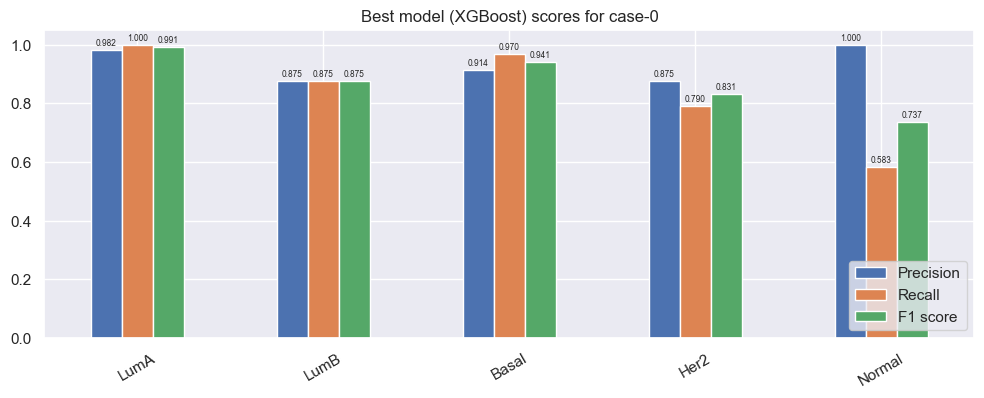

In [30]:
case_0_path = 'case_0'
xgb_exp_path = os.path.join(curr_dir, '..', 'experiments', 
                            case_0_path, 'run_08-05-2023_10:32:03.pkl')

with open(os.path.join(xgb_exp_path), 'rb') as file:
    xgb_exp = pickle.load(file)

ax = plt.figure()
df_lr = pd.DataFrame({'Precision': xgb_exp['Test results']['Precision per class'],
                   'Recall': xgb_exp['Test results']['Recall per class'],
                   'F1 score': xgb_exp['Test results']['F1 score per class']}, 
                   index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
ax = df_lr.plot(kind='bar', rot=30, title='Best model (' + xgb_exp['model_type'] + ') scores for case-0')
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.3f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=6)
plt.legend(loc='lower right')

(4,)


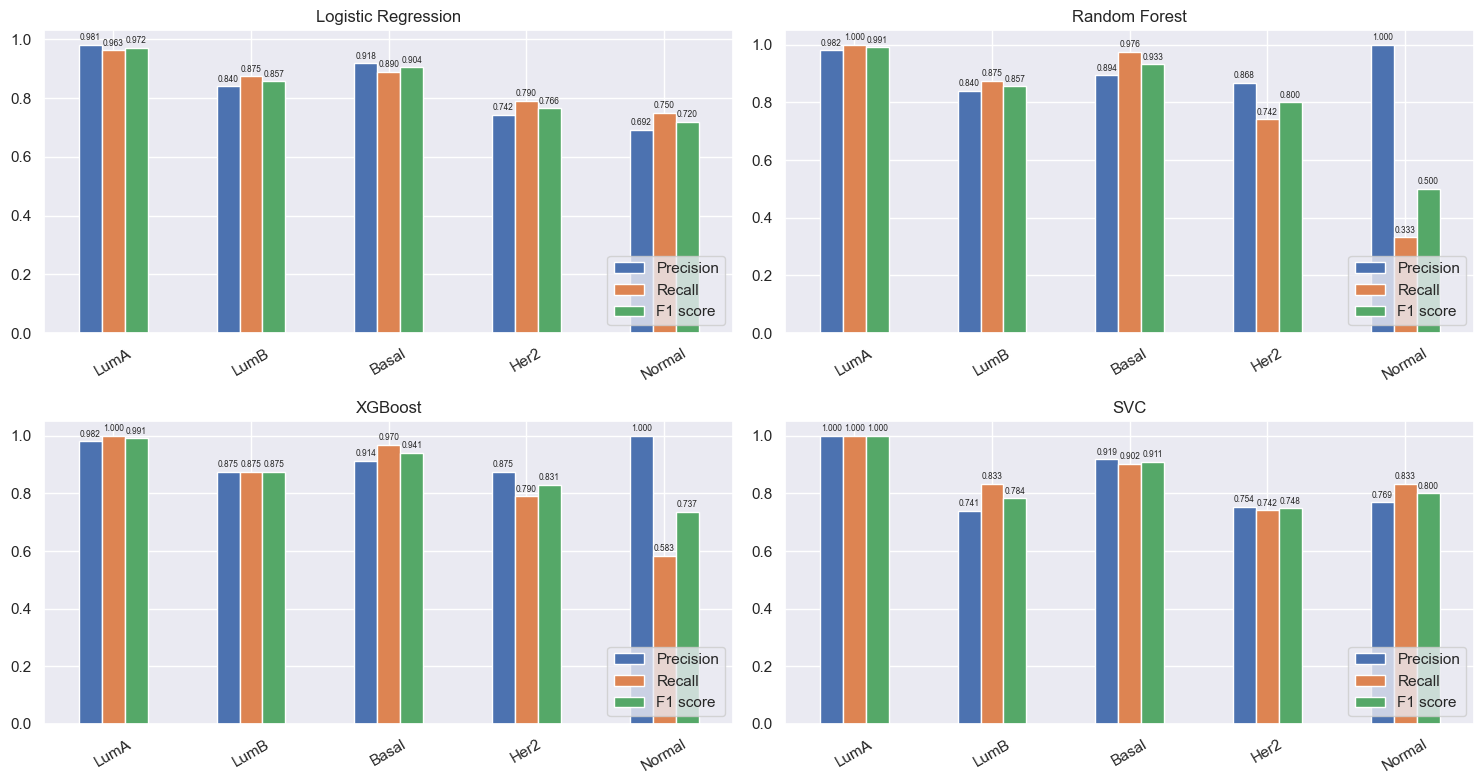

In [40]:
best_4_case_0_paths = [
    'run_08-05-2023_23:31:17.pkl',
    'run_08-05-2023_19:57:59.pkl',
    'run_08-05-2023_10:32:03.pkl',
    'run_08-05-2023_22:49:34.pkl']

fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(15, 8))
print(axs.ravel().shape)

for i, ax in enumerate(axs.ravel()):
    with open(os.path.join(curr_dir, '../experiments/case_0', best_4_case_0_paths[i]), 'rb') as file:
        exp = pickle.load(file)

    df_rf = pd.DataFrame({'Precision': exp['Test results']['Precision per class'],
                    'Recall': exp['Test results']['Recall per class'],
                    'F1 score': exp['Test results']['F1 score per class']}, 
                    index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
    df_rf.plot(kind='bar', rot=30, title=exp['model_type'], ax=ax)
    for g in ax.patches:
        ax.annotate(format(g.get_height(), '.3f'),
                    (g.get_x() + g.get_width() / 2., g.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points',
                    fontsize=6)
    ax.legend(loc='lower right')

plt.tight_layout()

### CASE 1

<Figure size 1200x400 with 0 Axes>

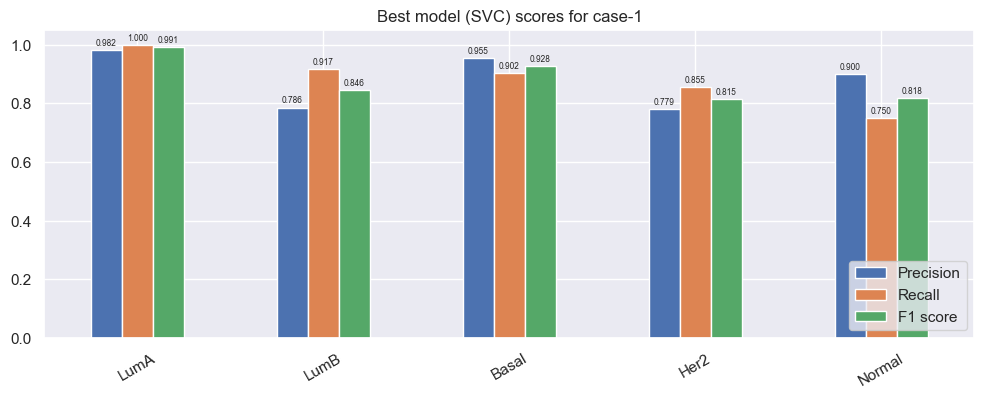

In [31]:
case_1_path = 'case_1'
svc_exp_path = os.path.join(curr_dir, '..', 'experiments', 
                            case_1_path, 'run_09-05-2023_02:29:40.pkl')

with open(os.path.join(svc_exp_path), 'rb') as file:
    svc_exp = pickle.load(file)

ax = plt.figure()
df_lr = pd.DataFrame({'Precision': svc_exp['Test results']['Precision per class'],
                   'Recall': svc_exp['Test results']['Recall per class'],
                   'F1 score': svc_exp['Test results']['F1 score per class']}, 
                   index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
ax = df_lr.plot(kind='bar', rot=30, title='Best model (' + svc_exp['model_type'] + ') scores for case-1')
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.3f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=6)
plt.legend(loc='lower right')

(4,)


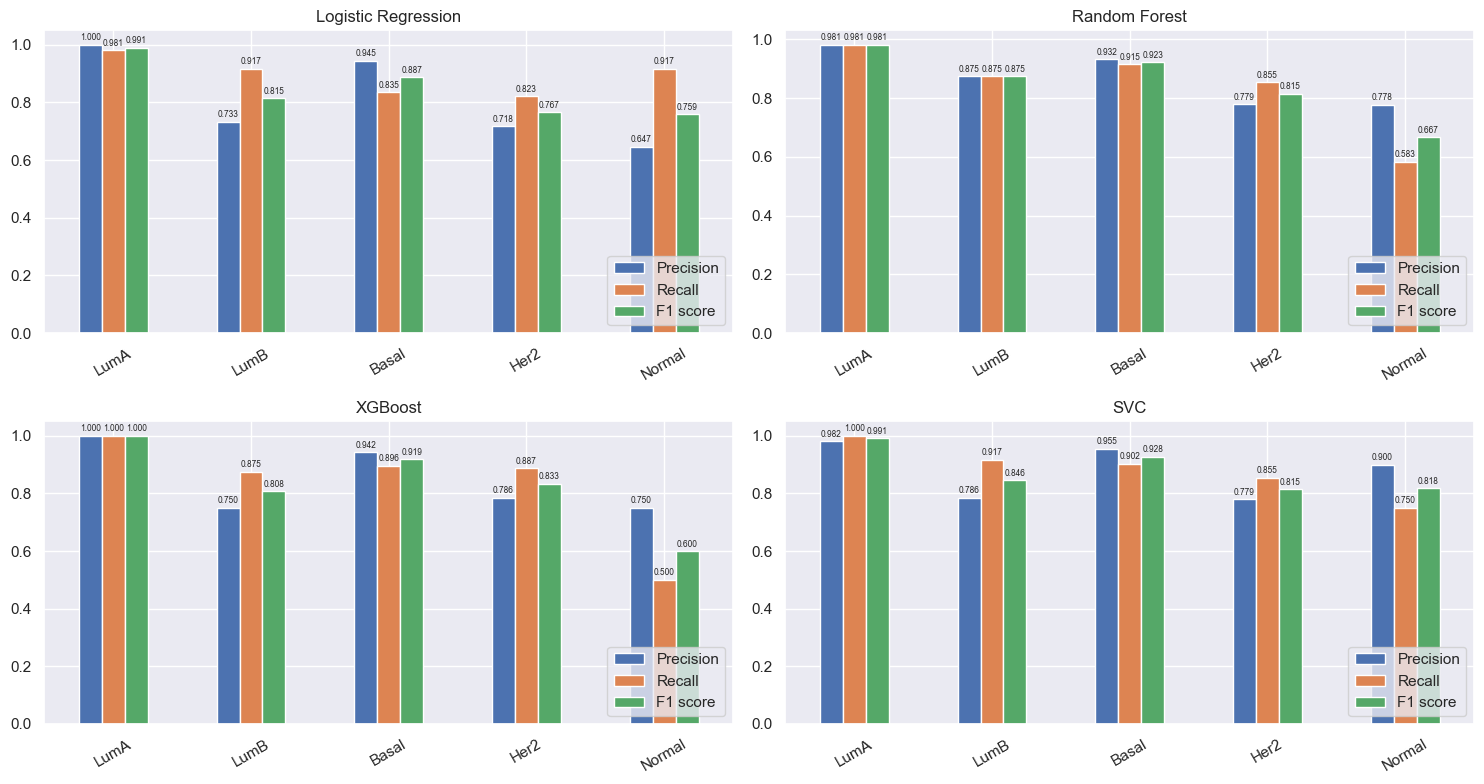

In [36]:
best_4_case_1_paths = [
    'run_09-05-2023_01:29:59.pkl',
    'run_09-05-2023_14:04:04.pkl',
    'run_09-05-2023_16:43:13.pkl', 
    'run_09-05-2023_02:29:40.pkl'
    ]

fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(15, 8))
print(axs.ravel().shape)

for i, ax in enumerate(axs.ravel()):
    with open(os.path.join(curr_dir, '../experiments/case_1', best_4_case_1_paths[i]), 'rb') as file:
        exp = pickle.load(file)

    df_rf = pd.DataFrame({'Precision': exp['Test results']['Precision per class'],
                    'Recall': exp['Test results']['Recall per class'],
                    'F1 score': exp['Test results']['F1 score per class']}, 
                    index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
    df_rf.plot(kind='bar', rot=30, title=exp['model_type'], ax=ax)
    for g in ax.patches:
        ax.annotate(format(g.get_height(), '.3f'),
                    (g.get_x() + g.get_width() / 2., g.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points',
                    fontsize=6)
    ax.legend(loc='lower right')

plt.tight_layout()

### CASE 1B

In [80]:
case_1_path = 'case_1'
exp_path = os.path.join(curr_dir, '..', 'experiments', 
                        case_1_path, 'run_11-05-2023_01:10:33.pkl')

with open(os.path.join(exp_path), 'rb') as file:
    exp = pickle.load(file)
print(exp['model_type'])
exp['model_params']

Logistic Regression


{'C': 0.05, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}

<Figure size 1200x400 with 0 Axes>

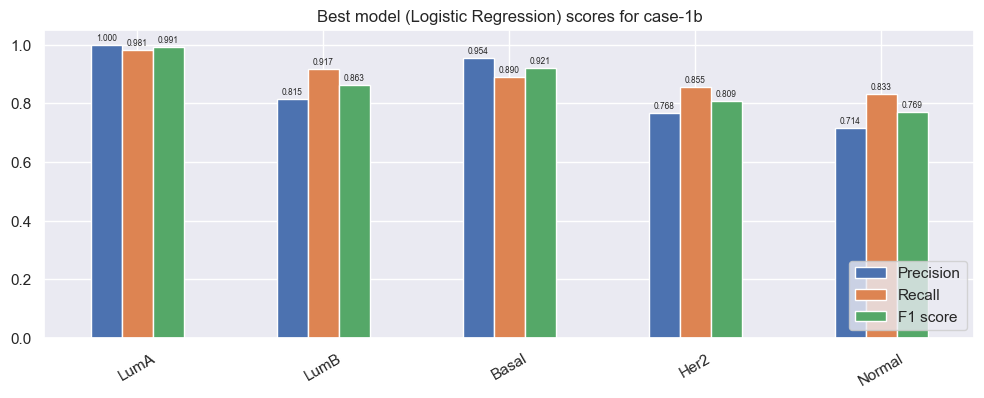

In [79]:
case_1_path = 'case_1'
svc_exp_path = os.path.join(curr_dir, '..', 'experiments', 
                            case_1_path, 'run_11-05-2023_01:10:33.pkl')

with open(os.path.join(svc_exp_path), 'rb') as file:
    svc_exp = pickle.load(file)

ax = plt.figure()
df_lr = pd.DataFrame({'Precision': svc_exp['Test results']['Precision per class'],
                   'Recall': svc_exp['Test results']['Recall per class'],
                   'F1 score': svc_exp['Test results']['F1 score per class']}, 
                   index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
ax = df_lr.plot(kind='bar', rot=30, title='Best model (' + svc_exp['model_type'] + ') scores for case-1b')
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.3f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=6)
plt.legend(loc='lower right')

(4,)


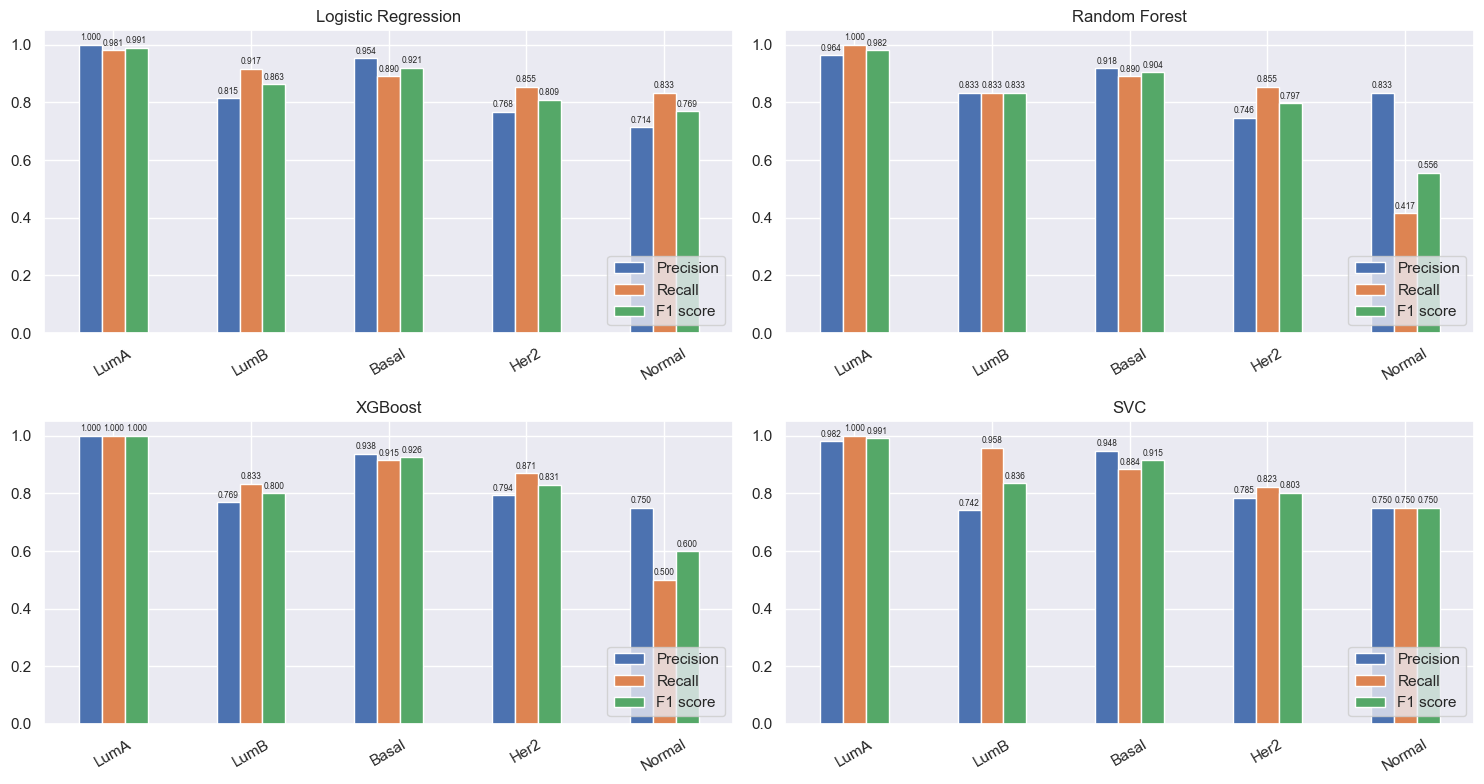

In [86]:
best_4_case_1_paths = [
    'run_11-05-2023_01:10:33.pkl',
    'run_11-05-2023_03:13:46.pkl', 
    'run_11-05-2023_03:56:29.pkl',
    'run_11-05-2023_02:32:40.pkl'
    ]

fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(15, 8))
print(axs.ravel().shape)

for i, ax in enumerate(axs.ravel()):
    with open(os.path.join(curr_dir, '../experiments/case_1', best_4_case_1_paths[i]), 'rb') as file:
        exp = pickle.load(file)

    df_rf = pd.DataFrame({'Precision': exp['Test results']['Precision per class'],
                    'Recall': exp['Test results']['Recall per class'],
                    'F1 score': exp['Test results']['F1 score per class']}, 
                    index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
    df_rf.plot(kind='bar', rot=30, title=exp['model_type'], ax=ax)
    for g in ax.patches:
        ax.annotate(format(g.get_height(), '.3f'),
                    (g.get_x() + g.get_width() / 2., g.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points',
                    fontsize=6)
    ax.legend(loc='lower right')

plt.tight_layout()

### CASE 2

In [61]:
exp_path = 'case_2/run_09-05-2023_20:51:26.pkl'
with open(os.path.join(curr_dir, '../experiments', exp_path), 'rb') as file:
    exp = pickle.load(file)
print(exp)

{'solve_ibm': True, 'ci_type': 'case2', 'cross_validation': False, 'multi_label_classification': False, 'n_folds': 10, 'n_features_to_select': 500, 'test_size': 0.3, 'feature_selection_method': 'univariate', 'optimized': True, 'model_type': 'SVC', 'model_params': {'C': 0.01, 'class_weight': None, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'tol': 0.01}, 'training_time': 1042.4853711128235, 'Test results': {'Accuracy weighted': 0.870253164556962, 'MCC': 0.8137153570488849, 'Precision weighted': 0.8727875788949123, 'Recall weighted': 0.870253164556962, 'F1 score weighted': 0.8645177578739157, 'Precision micro': 0.870253164556962, 'Recall micro': 0.870253164556962, 'F1 score micro': 0.870253164556962, 'Precision unweighted': 0.8874384415887169, 'Recall unweighted': 0.7843518622182415, 'F1 score unweighted': 0.8212920097093374, 'Precision per class': array([1.        , 0.6969697 , 0.95172414, 0.796875  , 0.47619048]), 'Recall per class': array([0.98148148, 0.95833333, 0.84146341, 0.822

<Figure size 1200x400 with 0 Axes>

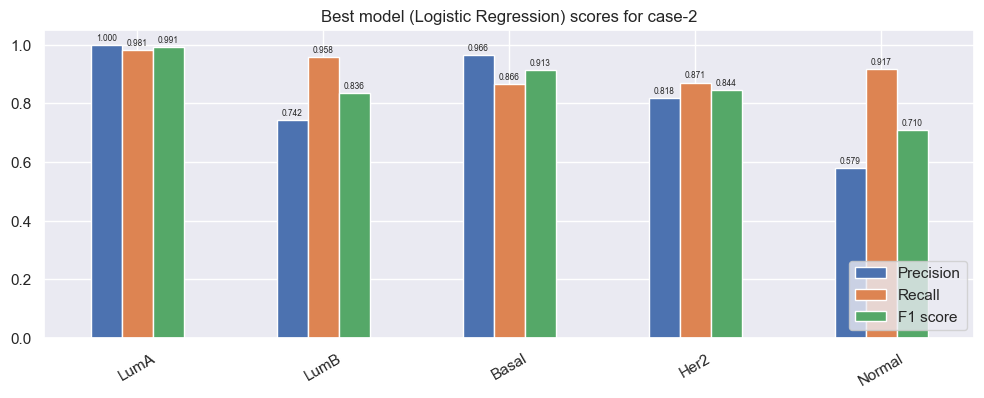

In [42]:
case_2_path = 'case_2'
lr_exp_path = os.path.join(curr_dir, '..', 'experiments', 
                            case_2_path, 'run_09-05-2023_20:07:57.pkl')

with open(os.path.join(lr_exp_path), 'rb') as file:
    lr_exp = pickle.load(file)

ax = plt.figure()
df_lr = pd.DataFrame({'Precision': lr_exp['Test results']['Precision per class'],
                   'Recall': lr_exp['Test results']['Recall per class'],
                   'F1 score': lr_exp['Test results']['F1 score per class']}, 
                   index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
ax = df_lr.plot(kind='bar', rot=30, title='Best model (' + lr_exp['model_type'] + ') scores for case-2')
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.3f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=6)
plt.legend(loc='lower right')

(4,)


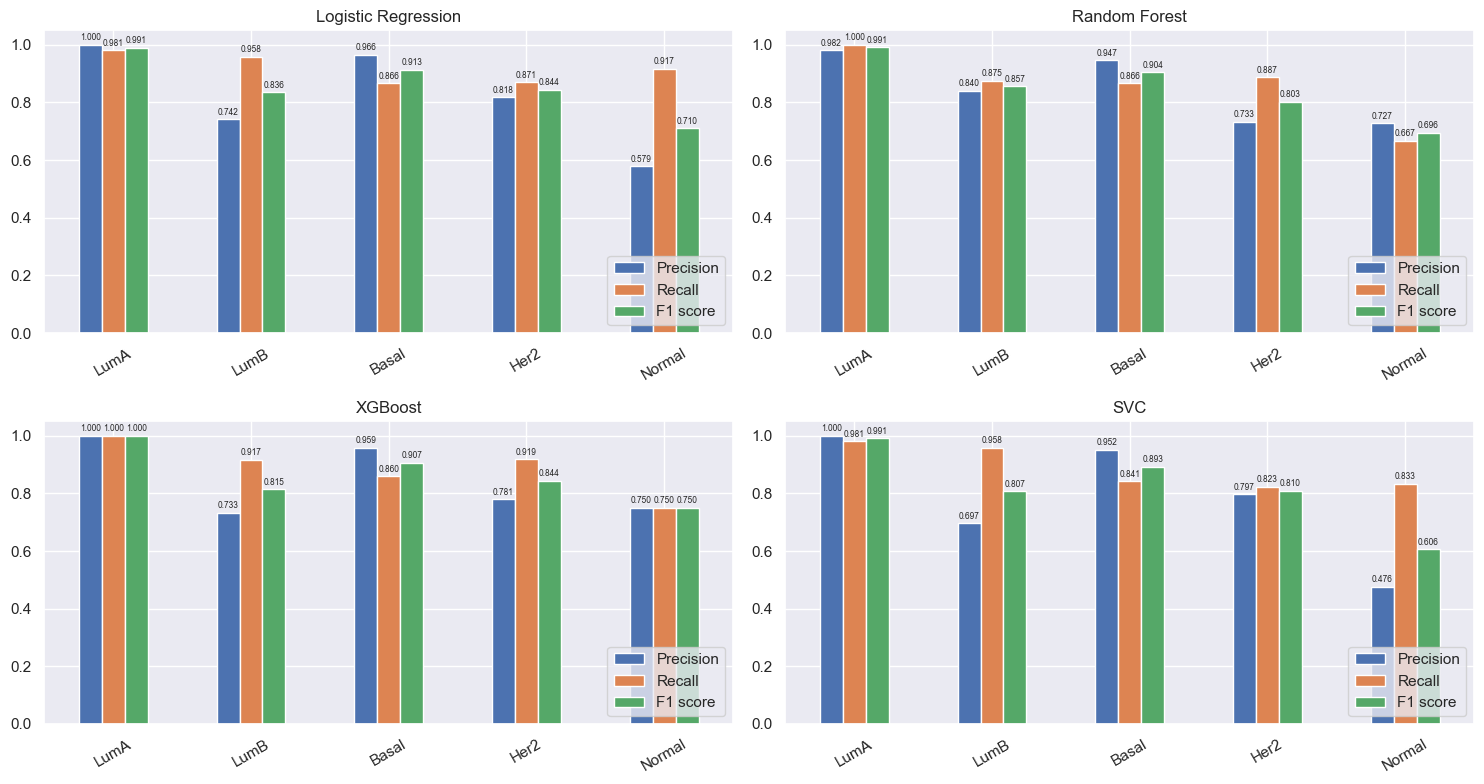

In [43]:
best_4_case_2_paths = [
    'run_09-05-2023_20:07:57.pkl',
    'run_09-05-2023_21:13:43.pkl',
    'run_09-05-2023_21:25:25.pkl', 
    'run_09-05-2023_20:51:26.pkl'
    ]

fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(15, 8))
print(axs.ravel().shape)

for i, ax in enumerate(axs.ravel()):
    with open(os.path.join(curr_dir, '../experiments/case_2', best_4_case_2_paths[i]), 'rb') as file:
        exp = pickle.load(file)

    df_rf = pd.DataFrame({'Precision': exp['Test results']['Precision per class'],
                    'Recall': exp['Test results']['Recall per class'],
                    'F1 score': exp['Test results']['F1 score per class']}, 
                    index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
    df_rf.plot(kind='bar', rot=30, title=exp['model_type'], ax=ax)
    for g in ax.patches:
        ax.annotate(format(g.get_height(), '.3f'),
                    (g.get_x() + g.get_width() / 2., g.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points',
                    fontsize=6)
    ax.legend(loc='lower right')

plt.tight_layout()

### CASE 3

In [60]:
exp_path = 'case_3/run_10-05-2023_00:18:29.pkl'
with open(os.path.join(curr_dir, '../experiments', exp_path), 'rb') as file:
    exp = pickle.load(file)
print(exp)

{'solve_ibm': True, 'ci_type': 'case3', 'cross_validation': False, 'multi_label_classification': False, 'n_folds': 10, 'n_features_to_select': 500, 'test_size': 0.3, 'feature_selection_method': 'univariate', 'optimized': True, 'model_type': 'Logistic Regression', 'model_params': {'C': 0.05, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}, 'training_time': 1832.0531878471375, 'Test results': {'Accuracy weighted': 0.8955696202531646, 'MCC': 0.85112935199124, 'Precision weighted': 0.899553419108439, 'Recall weighted': 0.8955696202531646, 'F1 score weighted': 0.8911979200049726, 'Precision micro': 0.8955696202531646, 'Recall micro': 0.8955696202531646, 'F1 score micro': 0.8955696202531646, 'Precision unweighted': 0.9123335373138678, 'Recall unweighted': 0.8123000195102916, 'F1 score unweighted': 0.850640934609937, 'Precision per class': array([1.        , 0.70588235, 0.97916667, 0.82089552, 0.55555556]), 'Recall per class': array([0.98148148, 1.        , 0.8597561 , 0.88709

<Figure size 1200x400 with 0 Axes>

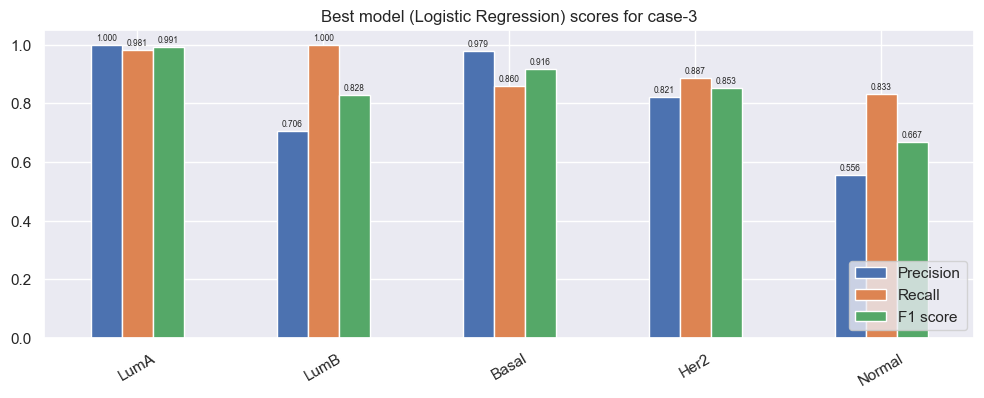

In [47]:
case_3_path = 'case_3'
lr_exp_path = os.path.join(curr_dir, '..', 'experiments', 
                            case_3_path, 'run_10-05-2023_00:18:29.pkl')

with open(os.path.join(lr_exp_path), 'rb') as file:
    lr_exp = pickle.load(file)

ax = plt.figure()
df_lr = pd.DataFrame({'Precision': lr_exp['Test results']['Precision per class'],
                   'Recall': lr_exp['Test results']['Recall per class'],
                   'F1 score': lr_exp['Test results']['F1 score per class']}, 
                   index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
ax = df_lr.plot(kind='bar', rot=30, title='Best model (' + lr_exp['model_type'] + ') scores for case-3')
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.3f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=6)
plt.legend(loc='lower right')

(4,)


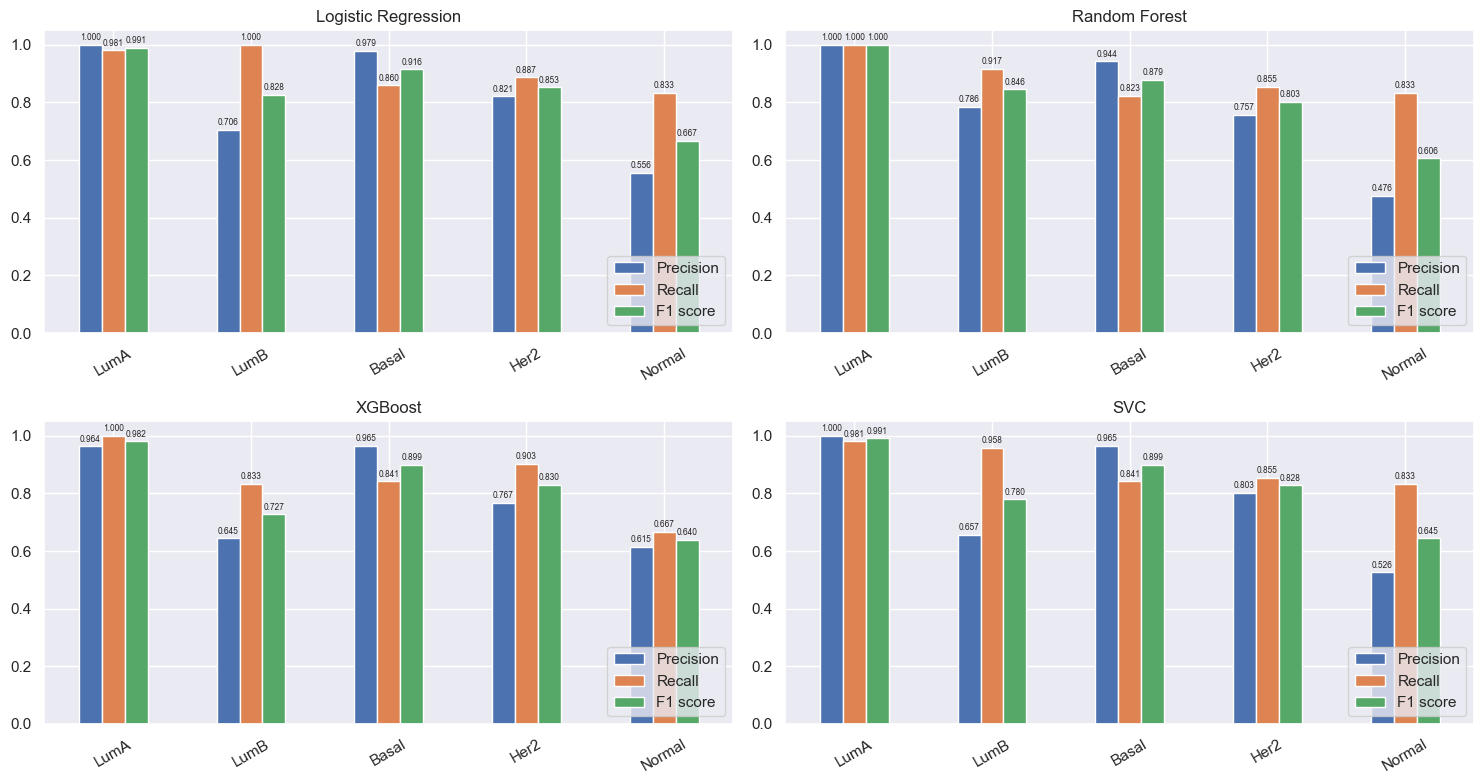

In [50]:
best_4_case_3_paths = [
    'run_10-05-2023_00:18:29.pkl',
    'run_10-05-2023_01:38:21.pkl', 
    'run_10-05-2023_01:48:17.pkl',
    'run_10-05-2023_01:21:33.pkl'
    ]

fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(15, 8))
print(axs.ravel().shape)

for i, ax in enumerate(axs.ravel()):
    with open(os.path.join(curr_dir, '../experiments/case_3', best_4_case_3_paths[i]), 'rb') as file:
        exp = pickle.load(file)

    df_rf = pd.DataFrame({'Precision': exp['Test results']['Precision per class'],
                    'Recall': exp['Test results']['Recall per class'],
                    'F1 score': exp['Test results']['F1 score per class']}, 
                    index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
    df_rf.plot(kind='bar', rot=30, title=exp['model_type'], ax=ax)
    for g in ax.patches:
        ax.annotate(format(g.get_height(), '.3f'),
                    (g.get_x() + g.get_width() / 2., g.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points',
                    fontsize=6)
    ax.legend(loc='lower right')

plt.tight_layout()

### CASE 4

In [64]:
exp_path = 'case_4/run_10-05-2023_14:25:43.pkl'
with open(os.path.join(curr_dir, '../experiments', exp_path), 'rb') as file:
    exp = pickle.load(file)
print(exp)

{'solve_ibm': True, 'ci_type': 'case4', 'cross_validation': False, 'multi_label_classification': False, 'n_folds': 10, 'n_features_to_select': 500, 'test_size': 0.3, 'feature_selection_method': 'univariate', 'optimized': True, 'model_type': 'LightGBM', 'model_params': {'learning_rate': 0.03, 'max_depth': 3, 'min_gain_to_split': 2, 'n_estimators': 100, 'num_leaves': 3, 'reg_alpha': 10, 'reg_lambda': 10}, 'training_time': 4379.82447886467, 'Test results': {'Accuracy weighted': 0.8354430379746836, 'MCC': 0.7735189936177789, 'Precision weighted': 0.8447081644407705, 'Recall weighted': 0.8354430379746836, 'F1 score weighted': 0.8289855096277954, 'Precision micro': 0.8354430379746836, 'Recall micro': 0.8354430379746836, 'F1 score micro': 0.8354430379746836, 'Precision unweighted': 0.8426370312090217, 'Recall unweighted': 0.7440207839698502, 'F1 score unweighted': 0.77984953710533, 'Precision per class': array([0.96428571, 0.61290323, 0.96923077, 0.7       , 0.47368421]), 'Recall per class': 

<Figure size 1200x400 with 0 Axes>

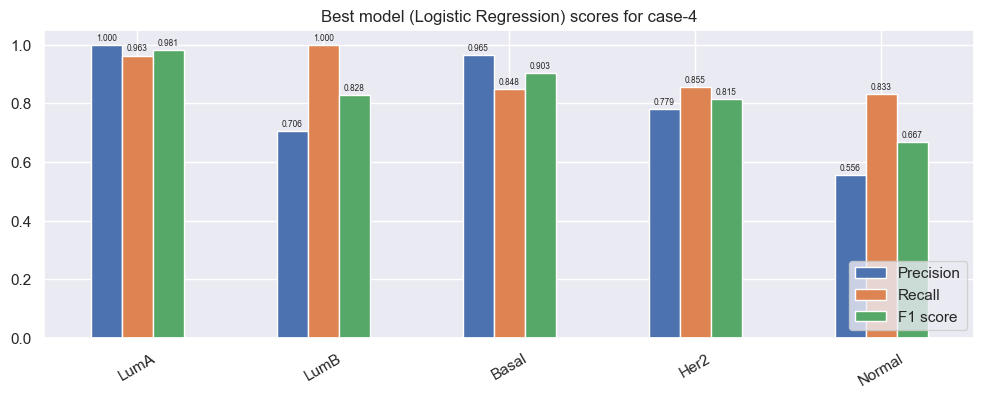

In [55]:
case_4_path = 'case_4'
lr_exp_path = os.path.join(curr_dir, '..', 'experiments', 
                            case_4_path, 'run_10-05-2023_12:10:55.pkl')

with open(os.path.join(lr_exp_path), 'rb') as file:
    lr_exp = pickle.load(file)

ax = plt.figure()
df_lr = pd.DataFrame({'Precision': lr_exp['Test results']['Precision per class'],
                   'Recall': lr_exp['Test results']['Recall per class'],
                   'F1 score': lr_exp['Test results']['F1 score per class']}, 
                   index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
ax = df_lr.plot(kind='bar', rot=30, title='Best model (' + lr_exp['model_type'] + ') scores for case-4')
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.3f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=6)
plt.legend(loc='lower right')

(4,)


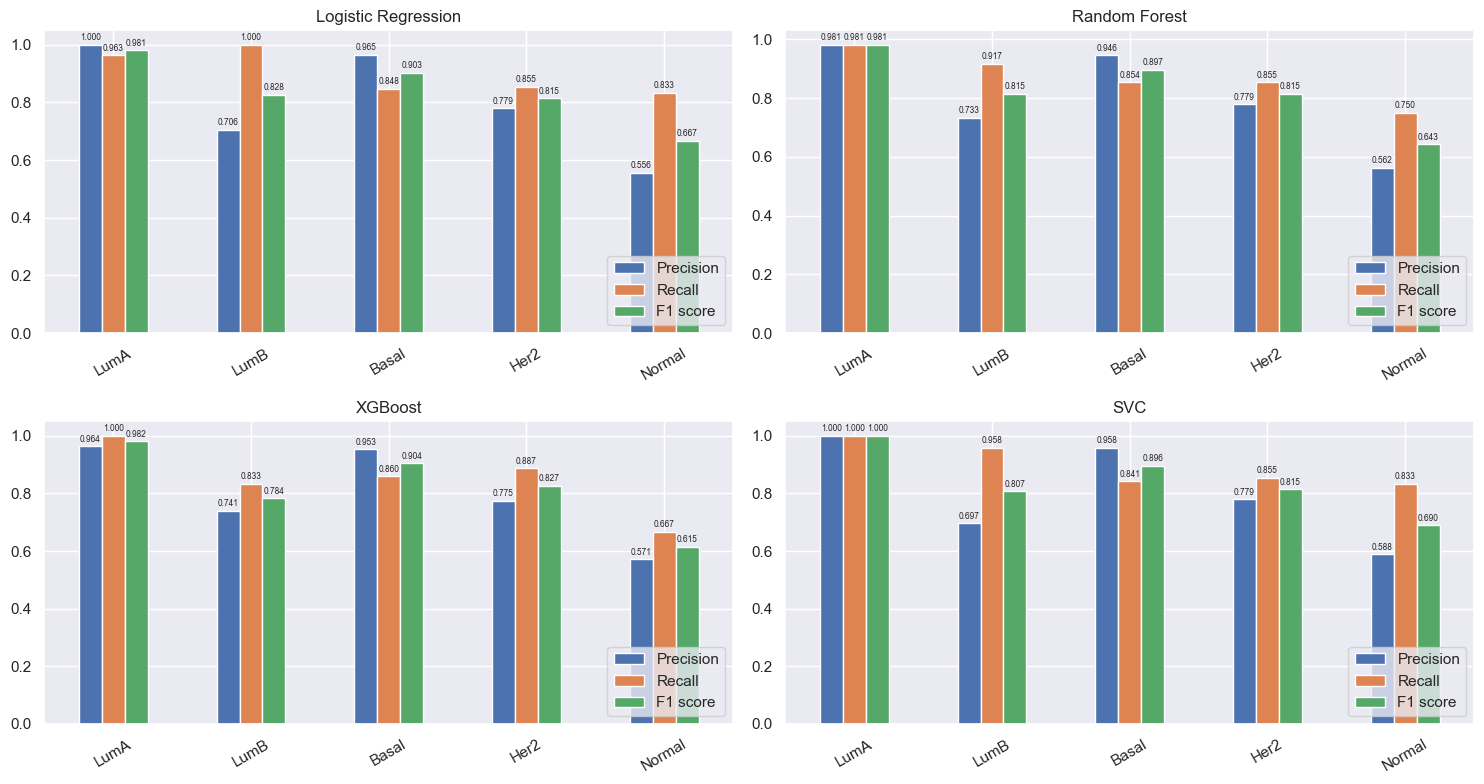

In [58]:
best_4_case_4_paths = [
    'run_10-05-2023_12:10:55.pkl',
    'run_10-05-2023_13:42:19.pkl',
    'run_10-05-2023_13:52:47.pkl',
    'run_10-05-2023_13:22:51.pkl'
    ]

fig, axs = plt.subplots(2, 2, squeeze=True, figsize=(15, 8))
print(axs.ravel().shape)

for i, ax in enumerate(axs.ravel()):
    with open(os.path.join(curr_dir, '../experiments/case_4', best_4_case_4_paths[i]), 'rb') as file:
        exp = pickle.load(file)

    df_rf = pd.DataFrame({'Precision': exp['Test results']['Precision per class'],
                    'Recall': exp['Test results']['Recall per class'],
                    'F1 score': exp['Test results']['F1 score per class']}, 
                    index=['LumA', 'LumB', 'Basal', 'Her2', 'Normal'])
    df_rf.plot(kind='bar', rot=30, title=exp['model_type'], ax=ax)
    for g in ax.patches:
        ax.annotate(format(g.get_height(), '.3f'),
                    (g.get_x() + g.get_width() / 2., g.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points',
                    fontsize=6)
    ax.legend(loc='lower right')

plt.tight_layout()

### ------------------------------ END --------------------------------------

In [81]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['Accuracy', 'MCC', 
              'Precision Weighted', 'Recall Weighted', 'F1 Score Weighted',
              'Precision Macro', 'Recall Macro', 'F1 Score Macro']
categories = [*categories, categories[0]]

case_0 = [0.91772, 0.87335, 
          0.92733, 0.91772, 0.92046,
          0.84363, 0.92912, 0.87480]

case_1 = [0.90506, 0.85832,
          0.90561, 0.90506, 0.90392,
          0.88478, 0.88035, 0.87968]

case_1b = [0.89873, 0.84995,
          0.89755, 0.89873, 0.89663,
          0.89531, 0.85029, 0.87058]

case_2 = [0.89556, 0.84919, 
          0.89844, 0.89556, 0.89190,
          0.91866, 0.82101, 0.85872]

case_3 = [0.89557, 0.85112,
          0.89955, 0.89556, 0.89119,
          0.91233, 0.81230, 0.85064]

case_4 = [0.87975, 0.82411, 
          0.87994, 0.87975, 0.87742,
          0.84937, 0.80076, 0.82248]

case_0 = [*case_0, case_0[0]]
case_1 = [*case_1, case_1[0]]
case_1b = [*case_1b, case_1b[0]]
case_2 = [*case_2, case_2[0]]
case_3 = [*case_3, case_3[0]]
case_4 = [*case_4, case_4[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=case_0, theta=categories, name='Case 0 (XGBoost)'),
        go.Scatterpolar(r=case_1, theta=categories, name='Case 1a (Support Vector Machine)'),
        go.Scatterpolar(r=case_1b, theta=categories, name='Case 1b (Logistic Regression)'),
        go.Scatterpolar(r=case_2, theta=categories, name='Case 2 (Logistic Regression)'),
        go.Scatterpolar(r=case_3, theta=categories, name='Case 3 (Logistic Regression)'),
        go.Scatterpolar(r=case_4, theta=categories, name='Case 4 (Logistic Regression)')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Case (Best Model) Comparison'),
        polar={'radialaxis': {'visible': False}},
        showlegend=True
    )
)

pyo.plot(fig)


'temp-plot.html'

In [88]:
exp_path = 'case_1/run_11-05-2023_19:37:56.pkl'
with open(os.path.join(curr_dir, '../experiments', exp_path), 'rb') as file:
    exp = pickle.load(file)
print(exp)

{'solve_ibm': True, 'ci_type': 'case1', 'cross_validation': False, 'multi_label_classification': False, 'n_folds': 10, 'n_features_to_select': 500, 'test_size': 0.3, 'feature_selection_method': 'univariate', 'optimized': True, 'model_type': 'Logistic Regression', 'model_params': {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.1}, 'training_time': 2573.0978059768677, 'Test results': {'Accuracy weighted': 0.8829113924050633, 'MCC': 0.8282987201094646, 'Precision weighted': 0.8828445938518865, 'Recall weighted': 0.8829113924050633, 'F1 score weighted': 0.8806079676054278, 'Precision micro': 0.8829113924050633, 'Recall micro': 0.8829113924050633, 'F1 score micro': 0.8829113924050633, 'Precision unweighted': 0.8821014366057639, 'Recall unweighted': 0.831039772633496, 'F1 score unweighted': 0.8539155938460337, 'Precision per class': array([0.96363636, 0.77777778, 0.95302013, 0.74647887, 0.71428571]), 'Recall per class': array([0.98148148, 0.875     , 0.86585366, 0.854

In [89]:


import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['Accuracy', 'MCC', 
              'Precision Weighted', 'Recall Weighted', 'F1 Score Weighted',
              'Precision Macro', 'Recall Macro', 'F1 Score Macro']
categories = [*categories, categories[0]]

case_1a = [0.90506, 0.85832,
          0.90561, 0.90506, 0.90392,
          0.88478, 0.88035, 0.87968]

case_1b = [0.89873, 0.84995,
          0.89755, 0.89873, 0.89663,
          0.89531, 0.85029, 0.87058]

case_1c = [0.88291, 0.82829, 
          0.88284, 0.88291, 0.88061,
          0.88210, 0.83104, 0.85391]

case_1a = [*case_1a, case_1a[0]]
case_1b = [*case_1b, case_1b[0]]
case_1c = [*case_1c, case_1c[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=case_1a, theta=categories, name='Case 1a (Support Vector Machine)'),
        go.Scatterpolar(r=case_1b, theta=categories, name='Case 1b (Logistic Regression)'),
        go.Scatterpolar(r=case_1c, theta=categories, name='Case 1c (Logistic Regression)')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Case-1 (Best Model) Comparison'),
        polar={'radialaxis': {'visible': False}},
        showlegend=True
    )
)

pyo.plot(fig)


'temp-plot.html'

In [2]:
curr_dir = os.getcwd()
experiments = sorted(glob.glob('../experiments/case_0/*.pkl'),  key=os.path.getmtime)
experiments

['../experiments/case_0/run_08-05-2023_10:32:03.pkl',
 '../experiments/case_0/run_08-05-2023_19:57:59.pkl',
 '../experiments/case_0/run_08-05-2023_22:49:34.pkl',
 '../experiments/case_0/run_08-05-2023_23:31:17.pkl',
 '../experiments/case_0/run_26-06-2023_14:55:03.pkl',
 '../experiments/case_0/run_26-06-2023_16:08:54.pkl',
 '../experiments/case_0/run_26-06-2023_16:10:01.pkl',
 '../experiments/case_0/run_26-06-2023_18:11:34.pkl',
 '../experiments/case_0/run_26-06-2023_19:05:05.pkl',
 '../experiments/case_0/run_26-06-2023_19:18:47.pkl',
 '../experiments/case_0/run_26-06-2023_20:56:34.pkl',
 '../experiments/case_0/run_26-06-2023_23:28:09.pkl']

In [4]:
exp_path = 'run_26-06-2023_23:28:09.pkl'
with open(os.path.join('../experiments/case_0', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

AdaBoost


{'Accuracy weighted': 0.8322784810126582,
 'MCC': 0.7424294597960657,
 'Precision weighted': 0.8995126829415837,
 'Recall weighted': 0.8322784810126582,
 'F1 score weighted': 0.8526338575376919,
 'Precision micro': 0.8322784810126582,
 'Recall micro': 0.8322784810126582,
 'F1 score micro': 0.8322784810126582,
 'Precision unweighted': 0.6715257743975289,
 'Recall unweighted': 0.824680170575693,
 'F1 score unweighted': 0.7051144120202163,
 'Precision per class': array([0.94642857, 0.85714286, 0.7960199 , 0.85714286, 0.66666667]),
 'Recall per class': array([0.98148148, 0.75      , 0.97560976, 0.48387097, 0.16666667]),
 'F1 score per class': array([0.96363636, 0.8       , 0.87671233, 0.6185567 , 0.26666667])}

In [5]:
exp_path = 'run_26-06-2023_20:56:34.pkl'
with open(os.path.join('../experiments/case_0', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

LightGBM


{'Accuracy weighted': 0.8829113924050633,
 'MCC': 0.8182741468915309,
 'Precision weighted': 0.9269700466757627,
 'Recall weighted': 0.8829113924050633,
 'F1 score weighted': 0.9025519452385387,
 'Precision micro': 0.8829113924050633,
 'Recall micro': 0.8829113924050633,
 'F1 score micro': 0.8829113924050633,
 'Precision unweighted': 0.6916273275635982,
 'Recall unweighted': 0.7097624698350651,
 'F1 score unweighted': 0.6977052277442114,
 'Precision per class': array([0.94736842, 0.89473684, 0.87912088, 0.82758621, 0.        ]),
 'Recall per class': array([1.        , 0.70833333, 0.97560976, 0.77419355, 0.        ]),
 'F1 score per class': array([0.97297297, 0.79069767, 0.92485549, 0.8       , 0.        ])}

In [6]:
exp_path = 'run_26-06-2023_19:18:47.pkl'
with open(os.path.join('../experiments/case_0', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

XGBoost


{'Accuracy weighted': 0.9082278481012658,
 'MCC': 0.8589232753441246,
 'Precision weighted': 0.9162666361249157,
 'Recall weighted': 0.9082278481012658,
 'F1 score weighted': 0.910424637797482,
 'Precision micro': 0.9082278481012658,
 'Recall micro': 0.9082278481012658,
 'F1 score micro': 0.9082278481012658,
 'Precision unweighted': 0.8399750852347232,
 'Recall unweighted': 0.9122880628143786,
 'F1 score unweighted': 0.8645080977366696,
 'Precision per class': array([0.98181818, 0.80769231, 0.9122807 , 0.85964912, 1.        ]),
 'Recall per class': array([1.        , 0.875     , 0.95121951, 0.79032258, 0.58333333]),
 'F1 score per class': array([0.99082569, 0.84      , 0.93134328, 0.82352941, 0.73684211])}

In [7]:
exp_path = 'run_26-06-2023_19:05:05.pkl'
with open(os.path.join('../experiments/case_0', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

Random Forest


{'Accuracy weighted': 0.9113924050632911,
 'MCC': 0.8632697925304512,
 'Precision weighted': 0.9231424722883406,
 'Recall weighted': 0.9113924050632911,
 'F1 score weighted': 0.9150949556520579,
 'Precision micro': 0.9113924050632911,
 'Recall micro': 0.9113924050632911,
 'F1 score micro': 0.9113924050632911,
 'Precision unweighted': 0.8186336218200891,
 'Recall unweighted': 0.908406015037594,
 'F1 score unweighted': 0.8527737054370661,
 'Precision per class': array([0.96428571, 0.95238095, 0.90857143, 0.85964912, 0.85714286]),
 'Recall per class': array([1.        , 0.83333333, 0.9695122 , 0.79032258, 0.5       ]),
 'F1 score per class': array([0.98181818, 0.88888889, 0.9380531 , 0.82352941, 0.63157895])}

In [8]:
exp_path = 'run_26-06-2023_18:11:34.pkl'
with open(os.path.join('../experiments/case_0', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

SVC


{'Accuracy weighted': 0.879746835443038,
 'MCC': 0.8183833396613245,
 'Precision weighted': 0.8794939000414234,
 'Recall weighted': 0.879746835443038,
 'F1 score weighted': 0.8788264535545426,
 'Precision micro': 0.879746835443038,
 'Recall micro': 0.879746835443038,
 'F1 score micro': 0.879746835443038,
 'Precision unweighted': 0.8533970044001515,
 'Recall unweighted': 0.8238067230121203,
 'F1 score unweighted': 0.8368736139688151,
 'Precision per class': array([1.        , 0.72413793, 0.91925466, 0.78333333, 0.69230769]),
 'Recall per class': array([0.98148148, 0.875     , 0.90243902, 0.75806452, 0.75      ]),
 'F1 score per class': array([0.99065421, 0.79245283, 0.91076923, 0.7704918 , 0.72      ])}

In [9]:
exp_path = 'run_26-06-2023_16:10:01.pkl'
with open(os.path.join('../experiments/case_0', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

Decision Tree


{'Accuracy weighted': 0.8259493670886076,
 'MCC': 0.7375082828488048,
 'Precision weighted': 0.8245079592061063,
 'Recall weighted': 0.8259493670886076,
 'F1 score weighted': 0.8243667818320146,
 'Precision micro': 0.8259493670886076,
 'Recall micro': 0.8259493670886076,
 'F1 score micro': 0.8259493670886076,
 'Precision unweighted': 0.7426996823731679,
 'Recall unweighted': 0.7287408644272666,
 'F1 score unweighted': 0.734080475277884,
 'Precision per class': array([0.94230769, 0.65517241, 0.89937107, 0.69230769, 0.45454545]),
 'Recall per class': array([0.90740741, 0.79166667, 0.87195122, 0.72580645, 0.41666667]),
 'F1 score per class': array([0.9245283 , 0.71698113, 0.88544892, 0.70866142, 0.43478261])}

In [10]:
exp_path = 'run_26-06-2023_16:08:54.pkl'
with open(os.path.join('../experiments/case_0', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

KNN


{'Accuracy weighted': 0.8734177215189873,
 'MCC': 0.805104437664774,
 'Precision weighted': 0.8940080902442342,
 'Recall weighted': 0.8734177215189873,
 'F1 score weighted': 0.8791571927402688,
 'Precision micro': 0.8734177215189873,
 'Recall micro': 0.8734177215189873,
 'F1 score micro': 0.8734177215189873,
 'Precision unweighted': 0.8057107264621033,
 'Recall unweighted': 0.867687747035573,
 'F1 score unweighted': 0.8312233559802437,
 'Precision per class': array([0.98181818, 0.95      , 0.85326087, 0.82608696, 0.72727273]),
 'Recall per class': array([1.        , 0.79166667, 0.95731707, 0.61290323, 0.66666667]),
 'F1 score per class': array([0.99082569, 0.86363636, 0.90229885, 0.7037037 , 0.69565217])}

In [11]:
exp_path = 'run_26-06-2023_14:55:03.pkl'
with open(os.path.join('../experiments/case_0', exp_path), 'rb') as file:
    exp = pickle.load(file)
    
print(exp['model_type'])
exp['Test results']

Logistic Regression


{'Accuracy weighted': 0.8924050632911392,
 'MCC': 0.8356309355983352,
 'Precision weighted': 0.8923404202736732,
 'Recall weighted': 0.8924050632911392,
 'F1 score weighted': 0.8921821281836204,
 'Precision micro': 0.8924050632911392,
 'Recall micro': 0.8924050632911392,
 'F1 score micro': 0.8924050632911392,
 'Precision unweighted': 0.8635071538887431,
 'Recall unweighted': 0.8651592851592852,
 'F1 score unweighted': 0.8637348585656607,
 'Precision per class': array([1.        , 0.86363636, 0.91515152, 0.77777778, 0.76923077]),
 'Recall per class': array([0.98148148, 0.79166667, 0.92073171, 0.79032258, 0.83333333]),
 'F1 score per class': array([0.99065421, 0.82608696, 0.91793313, 0.784     , 0.8       ])}

In [12]:
exp

{'solve_ibm': False,
 'ci_type': 'case1',
 'cross_validation': False,
 'multi_label_classification': False,
 'n_folds': 10,
 'n_features_to_select': 1000,
 'test_size': 0.3,
 'feature_selection_method': 'hybrid',
 'optimized': True,
 'threshold_cut_LumA': 200,
 'model_type': 'Logistic Regression',
 'model_params': {'C': 0.05,
  'max_iter': 500,
  'penalty': 'l2',
  'solver': 'sag',
  'tol': 0.001},
 'training_time': 4116.230865955353,
 'Test results': {'Accuracy weighted': 0.8924050632911392,
  'MCC': 0.8356309355983352,
  'Precision weighted': 0.8923404202736732,
  'Recall weighted': 0.8924050632911392,
  'F1 score weighted': 0.8921821281836204,
  'Precision micro': 0.8924050632911392,
  'Recall micro': 0.8924050632911392,
  'F1 score micro': 0.8924050632911392,
  'Precision unweighted': 0.8635071538887431,
  'Recall unweighted': 0.8651592851592852,
  'F1 score unweighted': 0.8637348585656607,
  'Precision per class': array([1.        , 0.86363636, 0.91515152, 0.77777778, 0.76923077])

# Single-label Part 

Reading results for single-label part

In [21]:
res_svm_fnm = 'run_21-07-2023_04:21:50.pkl'
with open(os.path.join('../experiments/case_0', res_svm_fnm), 'rb') as file:
    results_svm = pickle.load(file)['Test results']
results_svm

{'Accuracy weighted': 0.8734177215189873,
 'MCC': 0.801202413321178,
 'Precision weighted': 0.8826153970512622,
 'Recall weighted': 0.8734177215189873,
 'F1 score weighted': 0.8764437769442185,
 'Precision micro': 0.8734177215189873,
 'Recall micro': 0.8734177215189873,
 'F1 score micro': 0.8734177215189873,
 'Precision unweighted': 0.7941118768590607,
 'Recall unweighted': 0.8494135514577504,
 'F1 score unweighted': 0.8175065942507803,
 'Precision per class': array([0.96363636, 0.80952381, 0.87845304, 0.79545455, 0.8       ]),
 'Recall per class': array([0.94642857, 0.77272727, 0.93529412, 0.74468085, 0.57142857]),
 'F1 score per class': array([0.95495495, 0.79069767, 0.90598291, 0.76923077, 0.66666667])}

In [17]:
res_rf_fnm = 'run_21-07-2023_17:44:51.pkl'
with open(os.path.join('../experiments/case_0', res_rf_fnm), 'rb') as file:
    results_rf = pickle.load(file)['Test results']
results_rf

{'Accuracy weighted': 0.8734177215189873,
 'MCC': 0.8013834487280658,
 'Precision weighted': 0.9057698174145157,
 'Recall weighted': 0.8734177215189873,
 'F1 score weighted': 0.8816218170507681,
 'Precision micro': 0.8734177215189873,
 'Recall micro': 0.8734177215189873,
 'F1 score micro': 0.8734177215189873,
 'Precision macro': 0.7596279982012147,
 'Recall macro': 0.9035643112292859,
 'F1 score macro': 0.8083857412486634,
 'Precision per class': array([0.96296296, 0.85      , 0.84771574, 0.85714286, 1.        ]),
 'Recall per class': array([0.92857143, 0.77272727, 0.98235294, 0.63829787, 0.47619048]),
 'F1 score per class': array([0.94545455, 0.80952381, 0.91008174, 0.73170732, 0.64516129])}

In [16]:
res_xgb_fnm = 'run_21-07-2023_17:58:01.pkl'
with open(os.path.join('../experiments/case_0', res_xgb_fnm), 'rb') as file:
    results_xgb = pickle.load(file)['Test results']
results_xgb

{'Accuracy weighted': 0.879746835443038,
 'MCC': 0.811089780373701,
 'Precision weighted': 0.891890865005993,
 'Recall weighted': 0.879746835443038,
 'F1 score weighted': 0.8832435350903431,
 'Precision micro': 0.879746835443038,
 'Recall micro': 0.879746835443038,
 'F1 score micro': 0.879746835443038,
 'Precision macro': 0.7935912856438513,
 'Recall macro': 0.8777723810872982,
 'F1 score macro': 0.8261840372676286,
 'Precision per class': array([0.96428571, 0.94444444, 0.8839779 , 0.75      , 0.84615385]),
 'Recall per class': array([0.96428571, 0.77272727, 0.94117647, 0.76595745, 0.52380952]),
 'F1 score per class': array([0.96428571, 0.85      , 0.91168091, 0.75789474, 0.64705882])}

In [14]:
res_lr_fnm = 'run_22-07-2023_00:30:09.pkl'
with open(os.path.join('../experiments/case_0', res_lr_fnm), 'rb') as file:
    results_lr = pickle.load(file)['Test results']
results_lr

{'Accuracy weighted': 0.8829113924050633,
 'MCC': 0.8193508692589949,
 'Precision weighted': 0.8820384940941095,
 'Recall weighted': 0.8829113924050633,
 'F1 score weighted': 0.8823671845032602,
 'Precision micro': 0.8829113924050633,
 'Recall micro': 0.8829113924050633,
 'F1 score micro': 0.8829113924050633,
 'Precision macro': 0.8398342896152657,
 'Recall macro': 0.8402447847825998,
 'F1 score macro': 0.839907053730583,
 'Precision per class': array([0.98148148, 0.81818182, 0.91176471, 0.7755102 , 0.71428571]),
 'Recall per class': array([0.94642857, 0.81818182, 0.91176471, 0.80851064, 0.71428571]),
 'F1 score per class': array([0.96363636, 0.81818182, 0.91176471, 0.79166667, 0.71428571])}